In [2]:
## Importing Basic Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


In [1]:
from rake_nltk import Rake

In [3]:
# Reading all the dataframes

# Train Data
info_train = pd.read_csv('info_train.csv')
metadata_train = pd.read_csv('metadata_train.csv')
ratings_train = pd.read_csv('ratings_train.csv')

# Test Data
info_test = pd.read_csv('info_test.csv')
metadata_test = pd.read_csv('metadata_test.csv')
ratings_test = pd.read_csv('ratings_test.csv')

# Sample Submission
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
# Getting the shape of all traning data frames
print(info_train.shape)
print(metadata_train.shape)
print(ratings_train.shape)

# Getting the shape of all testing data frames
print(info_test.shape)
print(metadata_test.shape)
print(ratings_test.shape)

(12755, 10)
(12755, 6)
(12755, 4)
(4252, 9)
(4252, 6)
(4252, 4)


In [5]:
# Getting head of all the Dataframes

info_train.head()

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,Primary Genre,gamestore_price
0,https://apps.apple.com/us/app/lottery-life-mon...,Lottery Life - Monopoly Wars,4173eb39-046d-431e-a504-b5418301a382,Monopoly for the New Millenium,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""The spirit of Grand Theft Auto with the strat...",Opposite Lock Entertainment,"Games, Simulation, Finance, Strategy",Games,0.0
1,https://apps.apple.com/us/app/cute-little-unic...,Cute Little Unicorn Match3,c8cb6281-34fc-4e54-b6f9-1a30657fb370,Little Unicorn Match Crash,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Cute Unicorn Match3 Blast Bomb is a matching p...,Angrisa Leungtanapolkul,"Games, Entertainment, Strategy, Puzzle",Games,0.0
2,https://apps.apple.com/us/app/its-tanks/id5688...,"""It's Tanks!""",6a30fa24-b1c7-44b0-96e8-34b9c6c7232b,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Bored of playing yet another multiplayer word ...,Bit By Bit Games Ltd,"Games, Casual, Strategy",Games,0.0
3,https://apps.apple.com/us/app/dunes/id1453578024,Dunes,4df50e72-3f5c-470a-8834-b56b5610e17a,Warning: *May cause addiction*,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Race across our dunes in a effort to achieve ...,Sympo Games PTY LTD,"Games, Strategy, Productivity, Family",Games,0.0
4,https://apps.apple.com/us/app/cribbage-square-...,Cribbage Square Collection,d5832610-8ec2-44f5-989d-0f5fd9e67ef5,Solitaire crib games.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,CRIBBAGE SQUARE COLLECTION is an 12-in-1 colle...,MmpApps Corp.,"Games, Card, Entertainment, Strategy",Games,0.0


In [6]:
metadata_train.head()

,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,game_id
0,"0.99, 0.99, 1.99, 0.99, 7.99, 3.99, 14.99",EN,388948992.0,14/05/2018,28/12/2018,4173eb39-046d-431e-a504-b5418301a382
1,NaN,EN,18596864.0,9/11/2017,9/11/2017,c8cb6281-34fc-4e54-b6f9-1a30657fb370
2,"1.99, 0.99, 0.99, 0.99",EN,55459840.0,26/04/2013,30/05/2013,6a30fa24-b1c7-44b0-96e8-34b9c6c7232b
3,3.99,EN,187921408.0,23/02/2019,23/02/2019,4df50e72-3f5c-470a-8834-b56b5610e17a
4,NaN,EN,32905216.0,12/11/2013,16/01/2019,d5832610-8ec2-44f5-989d-0f5fd9e67ef5


In [7]:
ratings_train.head()

,Average User Rating,User Rating Count,Age Rating,game_id
0,4.0,25.0,12+,4173eb39-046d-431e-a504-b5418301a382
1,NaN,NaN,4+,c8cb6281-34fc-4e54-b6f9-1a30657fb370
2,3.5,27.0,9+,6a30fa24-b1c7-44b0-96e8-34b9c6c7232b
3,NaN,NaN,4+,4df50e72-3f5c-470a-8834-b56b5610e17a
4,NaN,NaN,4+,d5832610-8ec2-44f5-989d-0f5fd9e67ef5


In [8]:
# Merging all the data into one single dataframe for test and train seprately

# Train
df_train_1 = pd.merge(info_train, metadata_train,on='game_id')
df_train_2 = pd.merge(df_train_1, ratings_train,on='game_id')
df_train = df_train_2.copy()
print(df_train.shape)

(12755, 18)


In [9]:
df_train.head()

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,Primary Genre,gamestore_price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Age Rating
0,https://apps.apple.com/us/app/lottery-life-mon...,Lottery Life - Monopoly Wars,4173eb39-046d-431e-a504-b5418301a382,Monopoly for the New Millenium,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""The spirit of Grand Theft Auto with the strat...",Opposite Lock Entertainment,"Games, Simulation, Finance, Strategy",Games,0.0,"0.99, 0.99, 1.99, 0.99, 7.99, 3.99, 14.99",EN,388948992.0,14/05/2018,28/12/2018,4.0,25.0,12+
1,https://apps.apple.com/us/app/cute-little-unic...,Cute Little Unicorn Match3,c8cb6281-34fc-4e54-b6f9-1a30657fb370,Little Unicorn Match Crash,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Cute Unicorn Match3 Blast Bomb is a matching p...,Angrisa Leungtanapolkul,"Games, Entertainment, Strategy, Puzzle",Games,0.0,NaN,EN,18596864.0,9/11/2017,9/11/2017,NaN,NaN,4+
2,https://apps.apple.com/us/app/its-tanks/id5688...,"""It's Tanks!""",6a30fa24-b1c7-44b0-96e8-34b9c6c7232b,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Bored of playing yet another multiplayer word ...,Bit By Bit Games Ltd,"Games, Casual, Strategy",Games,0.0,"1.99, 0.99, 0.99, 0.99",EN,55459840.0,26/04/2013,30/05/2013,3.5,27.0,9+
3,https://apps.apple.com/us/app/dunes/id1453578024,Dunes,4df50e72-3f5c-470a-8834-b56b5610e17a,Warning: *May cause addiction*,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Race across our dunes in a effort to achieve ...,Sympo Games PTY LTD,"Games, Strategy, Productivity, Family",Games,0.0,3.99,EN,187921408.0,23/02/2019,23/02/2019,NaN,NaN,4+
4,https://apps.apple.com/us/app/cribbage-square-...,Cribbage Square Collection,d5832610-8ec2-44f5-989d-0f5fd9e67ef5,Solitaire crib games.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,CRIBBAGE SQUARE COLLECTION is an 12-in-1 colle...,MmpApps Corp.,"Games, Card, Entertainment, Strategy",Games,0.0,NaN,EN,32905216.0,12/11/2013,16/01/2019,NaN,NaN,4+


In [10]:
# Getting all the columns of the training dataframe

df_train.columns

Index(['URL', 'Name', 'game_id', 'Subtitle', 'Icon URL', 'Description',
       'Developer', 'Genres', 'Primary Genre', 'gamestore_price',
       'In-app Purchases', 'Languages', 'Size', 'Original Release Date',
       'Current Version Release Date', 'Average User Rating',
       'User Rating Count', 'Age Rating'],
      dtype='object')

In [11]:
# Getting head of all the test Dataframes

info_test.head()

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,Primary Genre
0,https://apps.apple.com/us/app/block-in-the-hol...,Block in the Hole Slider Puzzle Pro,a77cadb6-07f5-4f48-b012-df7b758cc3e4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""Check out this addictive and unique puzzle ga...",Amy Prizer,"Games, Strategy, Puzzle",Games
1,https://apps.apple.com/us/app/craft-warriors/i...,Craft Warriors,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e,A New Generation RTS,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""A new generation 3D real-time strategy game!\...","Translimit, Inc.","Games, Strategy, Simulation",Games
2,https://apps.apple.com/us/app/zero-tbs/id13998...,Zero TBS,ceb10cdb-ecf0-4028-b31b-54248fc102fe,Turn-based Strategy War Chess,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,A classic turn-based strategy that go straight...,FBM,"Games, Strategy, Board",Games
3,https://apps.apple.com/us/app/search-and-find-...,Search and Find Hidden Objects,67e3cf3d-c7fc-4046-97b0-c7066c084a13,Horror Library Hidden Objects,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Infinitely joyful fairytale valley used to be ...,Ajaysinh Jadeja,"Games, Puzzle, Strategy, Entertainment",Games
4,https://apps.apple.com/us/app/dodge-ball-game/...,Dodge Ball - Game,b521f9e1-74e5-410f-8971-4649a35f8e94,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Think you are up for this challenge?\n\nThe be...,Asfia sultana,"Games, Strategy, Entertainment, Puzzle",Games


In [12]:
metadata_test.head()

,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,game_id
0,NaN,EN,15772672.0,25/02/2017,25/02/2017,a77cadb6-07f5-4f48-b012-df7b758cc3e4
1,"7.99, 1.99, 0.99, 4.99, 9.99, 19.99, 7.99, 3.9...",EN,97515520.0,22/04/2018,29/07/2019,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e
2,NaN,EN,36504576.0,26/07/2018,10/04/2019,ceb10cdb-ecf0-4028-b31b-54248fc102fe
3,"1.99, 1.99",EN,32385024.0,3/06/2017,29/08/2018,67e3cf3d-c7fc-4046-97b0-c7066c084a13
4,NaN,EN,46436352.0,1/03/2016,1/03/2016,b521f9e1-74e5-410f-8971-4649a35f8e94


In [13]:
ratings_test.head()

,Average User Rating,User Rating Count,Age Rating,game_id
0,NaN,NaN,4+,a77cadb6-07f5-4f48-b012-df7b758cc3e4
1,4.5,14689.0,9+,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e
2,NaN,NaN,9+,ceb10cdb-ecf0-4028-b31b-54248fc102fe
3,2.5,10.0,4+,67e3cf3d-c7fc-4046-97b0-c7066c084a13
4,NaN,NaN,4+,b521f9e1-74e5-410f-8971-4649a35f8e94


In [14]:
# Merging all the data into one single dataframe for test and train seprately

# Test
df_test_1 = pd.merge(info_test, metadata_test,on='game_id')
df_test_2 = pd.merge(df_test_1, ratings_test,on='game_id')
df_test = df_test_2.copy()
print(df_test.shape)

(4252, 17)


In [15]:
df_test.head()

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,Primary Genre,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Age Rating
0,https://apps.apple.com/us/app/block-in-the-hol...,Block in the Hole Slider Puzzle Pro,a77cadb6-07f5-4f48-b012-df7b758cc3e4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""Check out this addictive and unique puzzle ga...",Amy Prizer,"Games, Strategy, Puzzle",Games,NaN,EN,15772672.0,25/02/2017,25/02/2017,NaN,NaN,4+
1,https://apps.apple.com/us/app/craft-warriors/i...,Craft Warriors,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e,A New Generation RTS,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""A new generation 3D real-time strategy game!\...","Translimit, Inc.","Games, Strategy, Simulation",Games,"7.99, 1.99, 0.99, 4.99, 9.99, 19.99, 7.99, 3.9...",EN,97515520.0,22/04/2018,29/07/2019,4.5,14689.0,9+
2,https://apps.apple.com/us/app/zero-tbs/id13998...,Zero TBS,ceb10cdb-ecf0-4028-b31b-54248fc102fe,Turn-based Strategy War Chess,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,A classic turn-based strategy that go straight...,FBM,"Games, Strategy, Board",Games,NaN,EN,36504576.0,26/07/2018,10/04/2019,NaN,NaN,9+
3,https://apps.apple.com/us/app/search-and-find-...,Search and Find Hidden Objects,67e3cf3d-c7fc-4046-97b0-c7066c084a13,Horror Library Hidden Objects,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Infinitely joyful fairytale valley used to be ...,Ajaysinh Jadeja,"Games, Puzzle, Strategy, Entertainment",Games,"1.99, 1.99",EN,32385024.0,3/06/2017,29/08/2018,2.5,10.0,4+
4,https://apps.apple.com/us/app/dodge-ball-game/...,Dodge Ball - Game,b521f9e1-74e5-410f-8971-4649a35f8e94,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Think you are up for this challenge?\n\nThe be...,Asfia sultana,"Games, Strategy, Entertainment, Puzzle",Games,NaN,EN,46436352.0,1/03/2016,1/03/2016,NaN,NaN,4+


In [16]:
# Getting all the columns of the testing dataframe

df_test.columns

Index(['URL', 'Name', 'game_id', 'Subtitle', 'Icon URL', 'Description',
       'Developer', 'Genres', 'Primary Genre', 'In-app Purchases', 'Languages',
       'Size', 'Original Release Date', 'Current Version Release Date',
       'Average User Rating', 'User Rating Count', 'Age Rating'],
      dtype='object')

In [17]:
# Performing the basic EDA to understand the dataframe 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12755 entries, 0 to 12754
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           12755 non-null  object 
 1   Name                          12755 non-null  object 
 2   game_id                       12755 non-null  object 
 3   Subtitle                      3938 non-null   object 
 4   Icon URL                      12755 non-null  object 
 5   Description                   12755 non-null  object 
 6   Developer                     12755 non-null  object 
 7   Genres                        12755 non-null  object 
 8   Primary Genre                 12755 non-null  object 
 9   gamestore_price               12738 non-null  float64
 10  In-app Purchases              5770 non-null   object 
 11  Languages                     12711 non-null  object 
 12  Size                          12755 non-null  float64
 13  O

In [18]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gamestore_price,12738.0,8.413000e-01,8.249099e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,12755.0,1.154937e+08,2.022066e+08,51328.0,22913536.0,56675328.0,132626944.0,3.916692e+09
Average User Rating,5687.0,4.055389e+00,7.543463e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,5687.0,2.772608e+03,2.509335e+04,5.0,12.0,45.0,311.0,1.277095e+06


In [19]:
# 1. Only 4 columns have numerical values
# 2. Data seems to have many missing values
# 3. Standard Deviation for the gamestore_price and size is very large indicating outliers or skewness of data

In [20]:
# Checking for missing values in the numerical columns individually
# Checking for individual distribution of numerical columns i.e gamestore_price, size; Average User Rating and User Rating Count
# Try to make data normal if possible with some transformations

In [21]:
print(df_train['gamestore_price'].isnull().values.sum())
print(df_train['Size'].isnull().values.sum())
print(df_train['Average User Rating'].isnull().values.sum())
print(df_train['User Rating Count'].isnull().values.sum())

17
0
7068
7068


In [22]:
df_train.shape

(12755, 18)

In [23]:
# Droping missing values rows for gamestore_price as there are only very few missing values
df_train = df_train.dropna(how='any', subset=['gamestore_price'])

In [24]:
df_train.shape

(12738, 18)

In [25]:
import seaborn as sns

In [26]:
# sns.pairplot(df_train,diag_kind='kde')

In [27]:
## Numerical Data are very much right skewed 
## Average User Rating is catergorical column
## Tranformation is verymuch required on gamestore_price and size column

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gamestore_price', ylabel='Density'>

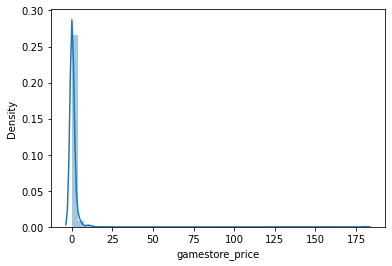

In [28]:

## Exploring the gamestore_price column
sns.distplot(df_train['gamestore_price'])

In [29]:
df_train['gamestore_price'].value_counts()

0.00      10686
0.99        808
1.99        378
2.99        348
4.99        177
3.99        112
9.99         70
11.99        41
5.99         29
6.99         26
179.99       25
7.99         12
8.99          8
19.99         8
14.99         3
139.99        1
16.99         1
99.99         1
29.99         1
12.99         1
37.99         1
36.99         1
Name: gamestore_price, dtype: int64

In [30]:
df_train = df_train.groupby('gamestore_price').filter(lambda x: len(x) >= 50)

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gamestore_price', ylabel='Density'>

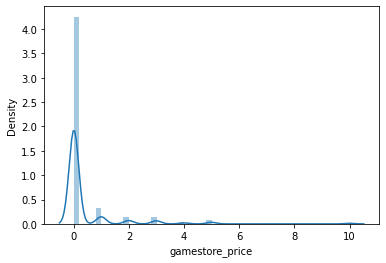

In [31]:
sns.distplot(df_train['gamestore_price'])

In [32]:
df_train['gamestore_price'].value_counts()

0.00    10686
0.99      808
1.99      378
2.99      348
4.99      177
3.99      112
9.99       70
Name: gamestore_price, dtype: int64

In [33]:
# Changing gamestore_pric as catergory data type

## to_log = ['gamestore_price']
## df_train['gamestore_price'] = df_train[to_log].applymap(lambda x: np.log(x+1))

## df = df.astype({"gamestore_price":'category'}) 
## df['gamestore_price'].dtypes


# Frequency Encoding as the data is Skewed

# grouping by frequency 
## fq = df.groupby('gamestore_price').size()/len(df)    
# mapping values to dataframe 
## df.loc[:, "{}_freq_encode".format('gamestore_price')] = df['gamestore_price'].map(fq)   
# drop original column. 
## df = df.drop(['gamestore_price'], axis = 1)  
## fq.plot.bar(stacked = True)   
## df.head(10) 

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

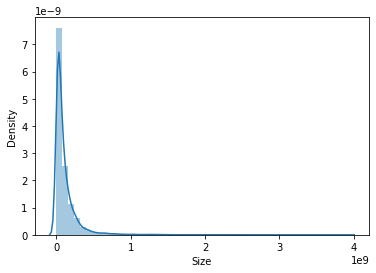

In [34]:
## Exploring the Size column
sns.distplot(df_train['Size'])

In [35]:
df_train['Size'] = df_train['Size']** (1.0 / 6)

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

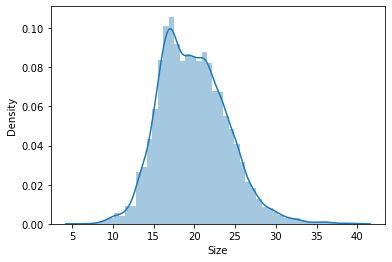

In [36]:
sns.distplot(df_train['Size'])

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

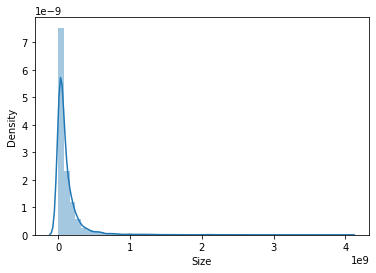

In [37]:
## Exploring the Size column in testing set
sns.distplot(df_test['Size'])

In [38]:

df_test['Size'] = df_test['Size']** (1.0 / 6)

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

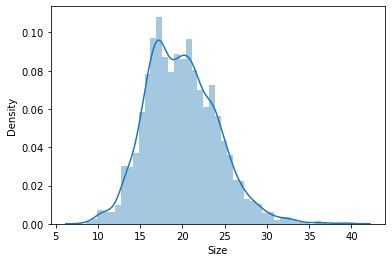

In [39]:
sns.distplot(df_test['Size'])

In [40]:
print(df_train.columns)

Index(['URL', 'Name', 'game_id', 'Subtitle', 'Icon URL', 'Description',
       'Developer', 'Genres', 'Primary Genre', 'gamestore_price',
       'In-app Purchases', 'Languages', 'Size', 'Original Release Date',
       'Current Version Release Date', 'Average User Rating',
       'User Rating Count', 'Age Rating'],
      dtype='object')


In [41]:
# Exploring In-app Purchases data

df_train['In-app Purchases'].describe()

count     5715
unique    2902
top       0.99
freq       726
Name: In-app Purchases, dtype: object

In [42]:
df_train['In-app Purchases'] = df_train['In-app Purchases'].str.split(',', expand=True).astype(float).sum(axis=1)

In [43]:
df_train['In-app Purchases'].describe()

count    12579.000000
mean        21.050103
std         54.792368
min          0.000000
25%          0.000000
50%          0.000000
75%          7.980000
max        674.900000
Name: In-app Purchases, dtype: float64

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='In-app Purchases', ylabel='Density'>

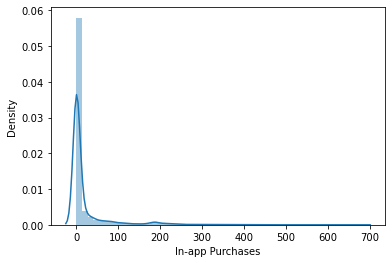

In [44]:
sns.distplot(df_train['In-app Purchases'])

In [45]:
#df_train = df_train.groupby('In-app Purchases').filter(lambda x: len(x) >= 50)

In [46]:
#sns.distplot(df_train['In-app Purchases'])

In [47]:
# Testing Data

df_test['In-app Purchases'].describe()

count     1913
unique    1092
top       0.99
freq       217
Name: In-app Purchases, dtype: object

In [48]:
df_test['In-app Purchases'] = df_test['In-app Purchases'].str.split(',', expand=True).astype(float).sum(axis=1)

In [49]:
df_test['In-app Purchases'].describe()

count    4252.000000
mean       22.540905
std        57.222744
min         0.000000
25%         0.000000
50%         0.000000
75%         7.980000
max       457.850000
Name: In-app Purchases, dtype: float64

C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='In-app Purchases', ylabel='Density'>

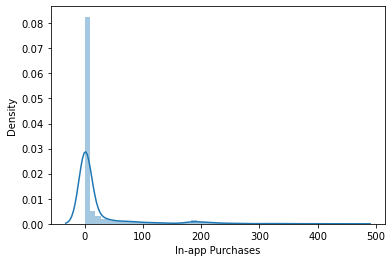

In [50]:
sns.distplot(df_test['In-app Purchases'])

In [51]:
#df_test = df_test.groupby('In-app Purchases').filter(lambda x: len(x) >= 50)

In [52]:
# Exploring Average User Rating
df_train['Average User Rating'].describe()

count    5622.000000
mean        4.055585
std         0.756327
min         1.000000
25%         3.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average User Rating, dtype: float64

In [53]:
df_train['Average User Rating'].value_counts()

4.5    2107
4.0    1285
5.0     740
3.5     685
3.0     377
2.5     253
2.0     120
1.5      46
1.0       9
Name: Average User Rating, dtype: int64

In [54]:
df_train['Average User Rating'].isnull().sum()

6957

In [55]:
df_train['Primary Genre'].value_counts()

Games                12058
Education              153
Entertainment          145
Utilities               53
Sports                  43
Reference               25
Stickers                22
Finance                 16
Productivity            13
Business                 9
Social Networking        8
Book                     7
News                     7
Lifestyle                6
Health & Fitness         5
Medical                  2
Music                    2
Navigation               2
Food & Drink             2
Travel                   1
Name: Primary Genre, dtype: int64

In [56]:
# Converting Primary Genre to category

df_train = df_train.astype({"Primary Genre":'category'}) 
df_train['Primary Genre'].dtypes

CategoricalDtype(categories=['Book', 'Business', 'Education', 'Entertainment', 'Finance',
                  'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle',
                  'Medical', 'Music', 'Navigation', 'News', 'Productivity',
                  'Reference', 'Social Networking', 'Sports', 'Stickers',
                  'Travel', 'Utilities'],
                 ordered=False)

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,gamestore_price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Age Rating,Primary Genre_freq_encode
0,https://apps.apple.com/us/app/lottery-life-mon...,Lottery Life - Monopoly Wars,4173eb39-046d-431e-a504-b5418301a382,Monopoly for the New Millenium,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""The spirit of Grand Theft Auto with the strat...",Opposite Lock Entertainment,"Games, Simulation, Finance, Strategy",0.0,31.93,EN,27.017725,14/05/2018,28/12/2018,4.0,25.0,12+,0.958582
1,https://apps.apple.com/us/app/cute-little-unic...,Cute Little Unicorn Match3,c8cb6281-34fc-4e54-b6f9-1a30657fb370,Little Unicorn Match Crash,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Cute Unicorn Match3 Blast Bomb is a matching p...,Angrisa Leungtanapolkul,"Games, Entertainment, Strategy, Puzzle",0.0,0.00,EN,16.276960,9/11/2017,9/11/2017,NaN,NaN,4+,0.958582
2,https://apps.apple.com/us/app/its-tanks/id5688...,"""It's Tanks!""",6a30fa24-b1c7-44b0-96e8-34b9c6c7232b,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Bored of playing yet another multiplayer word ...,Bit By Bit Games Ltd,"Games, Casual, Strategy",0.0,4.96,EN,19.528240,26/04/2013,30/05/2013,3.5,27.0,9+,0.958582
3,https://apps.apple.com/us/app/dunes/id1453578024,Dunes,4df50e72-3f5c-470a-8834-b56b5610e17a,Warning: *May cause addiction*,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Race across our dunes in a effort to achieve ...,Sympo Games PTY LTD,"Games, Strategy, Productivity, Family",0.0,3.99,EN,23.932939,23/02/2019,23/02/2019,NaN,NaN,4+,0.958582
4,https://apps.apple.com/us/app/cribbage-square-...,Cribbage Square Collection,d5832610-8ec2-44f5-989d-0f5fd9e67ef5,Solitaire crib games.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,CRIBBAGE SQUARE COLLECTION is an 12-in-1 colle...,MmpApps Corp.,"Games, Card, Entertainment, Strategy",0.0,0.00,EN,17.901007,12/11/2013,16/01/2019,NaN,NaN,4+,0.958582
5,https://apps.apple.com/us/app/cookie-monsters-...,Cookie Monsters A Clickers and Collectors Bake...,83c971c6-6358-471d-9d2e-33f9e3a253b4,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Free For A Limited Time \u2013 Try it Today\nA...,DartFrog llc,"Games, Strategy, Simulation",0.0,0.99,EN,14.337830,20/11/2013,20/11/2013,3.5,25.0,4+,0.958582
6,https://apps.apple.com/us/app/colo-r/id1303428132,Colo.r,99456c5a-037b-4c1f-8e40-63061bf56bb9,Minimal Puzzle Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"Best Puzzle Games on iOS.\n\nPolished, mind-be...",Refik Kasal,"Games, Entertainment, Puzzle, Strategy",0.0,0.00,EN,20.155865,31/10/2017,31/10/2017,NaN,NaN,4+,0.958582
7,https://apps.apple.com/us/app/extreme-turbo-gt...,Extreme Turbo GT Racing,b8bee0e2-3033-44a3-b014-f52e5802ed68,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,"""you have played many gt racing stunts game bu...",Waseem Ahmad,"Games, Strategy, Racing, Entertainment",0.0,2.99,EN,21.897968,16/09/2016,3/11/2016,NaN,NaN,4+,0.958582
8,https://apps.apple.com/us/app/simple-chess-boa...,Simple chess board,c2ee309a-8172-4551-9e0d-d9fc22491e1d,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,"""A simple chess board and a chess clock withou...",Luis Lopez,"Games, Strategy, Board, Utilities",0.0,0.99,"CA, EN, ES",13.897530,5/07/2012,10/11/2015,4.5,26.0,4+,0.958582
9,https://apps.apple.com/us/app/escape-plan-offi...,Escape Plan - Office Escape,5f15067f-a65b-48e0-b4a9-946ce2fab712,Break the usual,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Smartphone puzzles!\nAddicting mini puzzles!\n...,Ronald Calvert,"Games, Entertainment, Puzzle, Strategy",0.0,0.00,"EN, ZH, ZH",20.815601,9/07/2018,9/07/2018,3.5,27.0,17+,0.958582


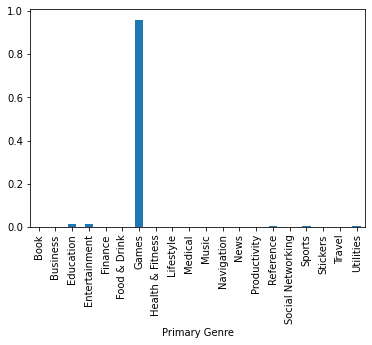

In [57]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq = df_train.groupby('Primary Genre').size()/len(df_train)  

# mapping values to dataframe 
df_train.loc[:, "{}_freq_encode".format('Primary Genre')] = df_train['Primary Genre'].map(fq)   

# drop original column. 
df_train = df_train.drop(['Primary Genre'], axis = 1)  
fq.plot.bar(stacked = True)   
df_train.head(10) 

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4252 entries, 0 to 4251
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4252 non-null   object 
 1   Name                          4252 non-null   object 
 2   game_id                       4252 non-null   object 
 3   Subtitle                      1323 non-null   object 
 4   Icon URL                      4252 non-null   object 
 5   Description                   4252 non-null   object 
 6   Developer                     4252 non-null   object 
 7   Genres                        4252 non-null   object 
 8   Primary Genre                 4252 non-null   object 
 9   In-app Purchases              4252 non-null   float64
 10  Languages                     4236 non-null   object 
 11  Size                          4251 non-null   float64
 12  Original Release Date         4252 non-null   object 
 13  Cur

In [59]:
df_test['Primary Genre'].value_counts()

Games                4063
Education              63
Entertainment          52
Utilities              22
Sports                 17
Stickers                7
Reference               7
Business                6
Lifestyle               4
Productivity            2
Food & Drink            2
Book                    2
Shopping                1
Navigation              1
Social Networking       1
Music                   1
Finance                 1
Name: Primary Genre, dtype: int64

In [60]:
# Converting Primary Genre to category

df_test = df_test.astype({"Primary Genre":'category'}) 
df_test['Primary Genre'].dtypes

CategoricalDtype(categories=['Book', 'Business', 'Education', 'Entertainment', 'Finance',
                  'Food & Drink', 'Games', 'Lifestyle', 'Music', 'Navigation',
                  'Productivity', 'Reference', 'Shopping', 'Social Networking',
                  'Sports', 'Stickers', 'Utilities'],
                 ordered=False)

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Age Rating,Primary Genre_freq_encode
0,https://apps.apple.com/us/app/block-in-the-hol...,Block in the Hole Slider Puzzle Pro,a77cadb6-07f5-4f48-b012-df7b758cc3e4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""Check out this addictive and unique puzzle ga...",Amy Prizer,"Games, Strategy, Puzzle",0.00,EN,15.836196,25/02/2017,25/02/2017,NaN,NaN,4+,0.322999
1,https://apps.apple.com/us/app/craft-warriors/i...,Craft Warriors,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e,A New Generation RTS,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""A new generation 3D real-time strategy game!\...","Translimit, Inc.","Games, Strategy, Simulation",167.90,EN,21.454198,22/04/2018,29/07/2019,4.5,14689.0,9+,0.322999
2,https://apps.apple.com/us/app/zero-tbs/id13998...,Zero TBS,ceb10cdb-ecf0-4028-b31b-54248fc102fe,Turn-based Strategy War Chess,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,A classic turn-based strategy that go straight...,FBM,"Games, Strategy, Board",0.00,EN,18.213408,26/07/2018,10/04/2019,NaN,NaN,9+,0.322999
3,https://apps.apple.com/us/app/search-and-find-...,Search and Find Hidden Objects,67e3cf3d-c7fc-4046-97b0-c7066c084a13,Horror Library Hidden Objects,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Infinitely joyful fairytale valley used to be ...,Ajaysinh Jadeja,"Games, Puzzle, Strategy, Entertainment",3.98,EN,17.853528,3/06/2017,29/08/2018,2.5,10.0,4+,0.322999
4,https://apps.apple.com/us/app/dodge-ball-game/...,Dodge Ball - Game,b521f9e1-74e5-410f-8971-4649a35f8e94,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Think you are up for this challenge?\n\nThe be...,Asfia sultana,"Games, Strategy, Entertainment, Puzzle",0.00,EN,18.958749,1/03/2016,1/03/2016,NaN,NaN,4+,0.322999
5,https://apps.apple.com/us/app/clash-rate/id915...,Clash Rate,37d08c7e-e164-49b3-8c32-31c23a70c743,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Clash Rate generates Core Skill Ratings and a ...,"Tykon, Inc.","Games, Entertainment, Adventure, Strategy",0.00,EN,12.387151,14/09/2014,14/09/2014,5.0,5.0,4+,0.322999
6,https://apps.apple.com/us/app/tazzs-adventures...,"""Tazz's Adventures""",4c073be6-df83-49b1-b115-aa2f3f56dacc,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,"""Tazz's Adventure is a match 3 puzzle game wit...",George Escobar,"Games, Casual, Entertainment, Strategy",1.98,EN,24.189362,4/11/2017,18/12/2017,5.0,5.0,4+,0.322999
7,https://apps.apple.com/us/app/5-elements-multi...,5 Elements Multiplayer Match-3,a9521107-e877-44a5-9a08-606dac8f2aef,Match-3 MOBA RPG combination,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Join our unique turn-based games where match-3...,linktime,"Games, Strategy, Role Playing, Entertainment",68.95,EN,30.749795,11/01/2018,5/06/2019,NaN,NaN,12+,0.322999
8,https://apps.apple.com/us/app/kitty-cat-clicke...,Kitty Cat Clicker - Feed the Virtual Pet Kitte...,41472230-f739-461b-9ce5-0adc4b4cdb15,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,"""The Internet might not be ready for this: cat...",Tapps Tecnologia da Informa\xe7\xe3o Ltda.,"Games, Entertainment, Strategy, Family",15.93,EN,18.711405,7/03/2014,10/02/2016,4.5,3148.0,4+,0.322999
9,https://apps.apple.com/us/app/angel-town-3-new...,Angel Town 3- new idle games,90444094-2da6-40aa-ad3b-bc243744f0e1,2019 indie tactical RPG,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""\u30102019 New Idle RPG\u3011\n\u25c6The worl...",Crab Soft,"Games, Entertainment, Strategy, Role Playing",33.97,"EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH",25.079673,2/10/2017,17/07/2019,3.5,5.0,4+,0.322999


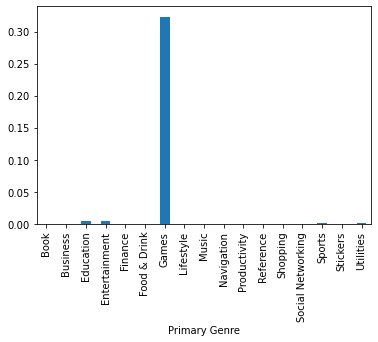

In [61]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq_test = df_test.groupby('Primary Genre').size()/len(df_train)  

# mapping values to dataframe 
df_test.loc[:, "{}_freq_encode".format('Primary Genre')] = df_test['Primary Genre'].map(fq_test)   

# drop original column. 
df_test = df_test.drop(['Primary Genre'], axis = 1)  
fq_test.plot.bar(stacked = True)   
df_test.head(10) 

In [62]:
## Understanding Age Rating Column

df_train['Age Rating'].value_counts()

4+     8761
9+     1839
12+    1495
17+     484
Name: Age Rating, dtype: int64

In [63]:
df_test['Age Rating'].value_counts()

4+     2941
9+      601
12+     539
17+     171
Name: Age Rating, dtype: int64

In [64]:
# Converting Age Rating to category

df_train = df_train.astype({"Age Rating":'category'}) 
df_train['Age Rating'].dtypes

CategoricalDtype(categories=['12+', '17+', '4+', '9+'], ordered=False)

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,gamestore_price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode
0,https://apps.apple.com/us/app/lottery-life-mon...,Lottery Life - Monopoly Wars,4173eb39-046d-431e-a504-b5418301a382,Monopoly for the New Millenium,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""The spirit of Grand Theft Auto with the strat...",Opposite Lock Entertainment,"Games, Simulation, Finance, Strategy",0.0,31.93,EN,27.017725,14/05/2018,28/12/2018,4.0,25.0,0.958582,0.118849
1,https://apps.apple.com/us/app/cute-little-unic...,Cute Little Unicorn Match3,c8cb6281-34fc-4e54-b6f9-1a30657fb370,Little Unicorn Match Crash,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Cute Unicorn Match3 Blast Bomb is a matching p...,Angrisa Leungtanapolkul,"Games, Entertainment, Strategy, Puzzle",0.0,0.00,EN,16.276960,9/11/2017,9/11/2017,NaN,NaN,0.958582,0.696478
2,https://apps.apple.com/us/app/its-tanks/id5688...,"""It's Tanks!""",6a30fa24-b1c7-44b0-96e8-34b9c6c7232b,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Bored of playing yet another multiplayer word ...,Bit By Bit Games Ltd,"Games, Casual, Strategy",0.0,4.96,EN,19.528240,26/04/2013,30/05/2013,3.5,27.0,0.958582,0.146196
3,https://apps.apple.com/us/app/dunes/id1453578024,Dunes,4df50e72-3f5c-470a-8834-b56b5610e17a,Warning: *May cause addiction*,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Race across our dunes in a effort to achieve ...,Sympo Games PTY LTD,"Games, Strategy, Productivity, Family",0.0,3.99,EN,23.932939,23/02/2019,23/02/2019,NaN,NaN,0.958582,0.696478
4,https://apps.apple.com/us/app/cribbage-square-...,Cribbage Square Collection,d5832610-8ec2-44f5-989d-0f5fd9e67ef5,Solitaire crib games.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,CRIBBAGE SQUARE COLLECTION is an 12-in-1 colle...,MmpApps Corp.,"Games, Card, Entertainment, Strategy",0.0,0.00,EN,17.901007,12/11/2013,16/01/2019,NaN,NaN,0.958582,0.696478
5,https://apps.apple.com/us/app/cookie-monsters-...,Cookie Monsters A Clickers and Collectors Bake...,83c971c6-6358-471d-9d2e-33f9e3a253b4,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Free For A Limited Time \u2013 Try it Today\nA...,DartFrog llc,"Games, Strategy, Simulation",0.0,0.99,EN,14.337830,20/11/2013,20/11/2013,3.5,25.0,0.958582,0.696478
6,https://apps.apple.com/us/app/colo-r/id1303428132,Colo.r,99456c5a-037b-4c1f-8e40-63061bf56bb9,Minimal Puzzle Game,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"Best Puzzle Games on iOS.\n\nPolished, mind-be...",Refik Kasal,"Games, Entertainment, Puzzle, Strategy",0.0,0.00,EN,20.155865,31/10/2017,31/10/2017,NaN,NaN,0.958582,0.696478
7,https://apps.apple.com/us/app/extreme-turbo-gt...,Extreme Turbo GT Racing,b8bee0e2-3033-44a3-b014-f52e5802ed68,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,"""you have played many gt racing stunts game bu...",Waseem Ahmad,"Games, Strategy, Racing, Entertainment",0.0,2.99,EN,21.897968,16/09/2016,3/11/2016,NaN,NaN,0.958582,0.696478
8,https://apps.apple.com/us/app/simple-chess-boa...,Simple chess board,c2ee309a-8172-4551-9e0d-d9fc22491e1d,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,"""A simple chess board and a chess clock withou...",Luis Lopez,"Games, Strategy, Board, Utilities",0.0,0.99,"CA, EN, ES",13.897530,5/07/2012,10/11/2015,4.5,26.0,0.958582,0.696478
9,https://apps.apple.com/us/app/escape-plan-offi...,Escape Plan - Office Escape,5f15067f-a65b-48e0-b4a9-946ce2fab712,Break the usual,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Smartphone puzzles!\nAddicting mini puzzles!\n...,Ronald Calvert,"Games, Entertainment, Puzzle, Strategy",0.0,0.00,"EN, ZH, ZH",20.815601,9/07/2018,9/07/2018,3.5,27.0,0.958582,0.038477


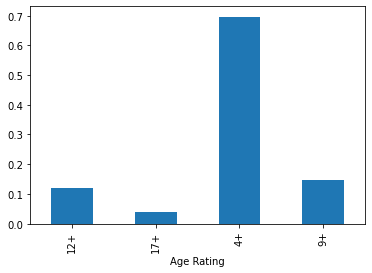

In [65]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq = df_train.groupby('Age Rating').size()/len(df_train)  

# mapping values to dataframe 
df_train.loc[:, "{}_freq_encode".format('Age Rating')] = df_train['Age Rating'].map(fq)   

# drop original column. 
df_train = df_train.drop(['Age Rating'], axis = 1)  
fq.plot.bar(stacked = True)   
df_train.head(10) 

In [66]:
# Converting Age Rating to category

df_test = df_test.astype({"Age Rating":'category'}) 
df_test['Age Rating'].dtypes

CategoricalDtype(categories=['12+', '17+', '4+', '9+'], ordered=False)

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode
0,https://apps.apple.com/us/app/block-in-the-hol...,Block in the Hole Slider Puzzle Pro,a77cadb6-07f5-4f48-b012-df7b758cc3e4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""Check out this addictive and unique puzzle ga...",Amy Prizer,"Games, Strategy, Puzzle",0.00,EN,15.836196,25/02/2017,25/02/2017,NaN,NaN,0.322999,0.233802
1,https://apps.apple.com/us/app/craft-warriors/i...,Craft Warriors,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e,A New Generation RTS,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""A new generation 3D real-time strategy game!\...","Translimit, Inc.","Games, Strategy, Simulation",167.90,EN,21.454198,22/04/2018,29/07/2019,4.5,14689.0,0.322999,0.047778
2,https://apps.apple.com/us/app/zero-tbs/id13998...,Zero TBS,ceb10cdb-ecf0-4028-b31b-54248fc102fe,Turn-based Strategy War Chess,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,A classic turn-based strategy that go straight...,FBM,"Games, Strategy, Board",0.00,EN,18.213408,26/07/2018,10/04/2019,NaN,NaN,0.322999,0.047778
3,https://apps.apple.com/us/app/search-and-find-...,Search and Find Hidden Objects,67e3cf3d-c7fc-4046-97b0-c7066c084a13,Horror Library Hidden Objects,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Infinitely joyful fairytale valley used to be ...,Ajaysinh Jadeja,"Games, Puzzle, Strategy, Entertainment",3.98,EN,17.853528,3/06/2017,29/08/2018,2.5,10.0,0.322999,0.233802
4,https://apps.apple.com/us/app/dodge-ball-game/...,Dodge Ball - Game,b521f9e1-74e5-410f-8971-4649a35f8e94,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Think you are up for this challenge?\n\nThe be...,Asfia sultana,"Games, Strategy, Entertainment, Puzzle",0.00,EN,18.958749,1/03/2016,1/03/2016,NaN,NaN,0.322999,0.233802
5,https://apps.apple.com/us/app/clash-rate/id915...,Clash Rate,37d08c7e-e164-49b3-8c32-31c23a70c743,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Clash Rate generates Core Skill Ratings and a ...,"Tykon, Inc.","Games, Entertainment, Adventure, Strategy",0.00,EN,12.387151,14/09/2014,14/09/2014,5.0,5.0,0.322999,0.233802
6,https://apps.apple.com/us/app/tazzs-adventures...,"""Tazz's Adventures""",4c073be6-df83-49b1-b115-aa2f3f56dacc,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,"""Tazz's Adventure is a match 3 puzzle game wit...",George Escobar,"Games, Casual, Entertainment, Strategy",1.98,EN,24.189362,4/11/2017,18/12/2017,5.0,5.0,0.322999,0.233802
7,https://apps.apple.com/us/app/5-elements-multi...,5 Elements Multiplayer Match-3,a9521107-e877-44a5-9a08-606dac8f2aef,Match-3 MOBA RPG combination,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Join our unique turn-based games where match-3...,linktime,"Games, Strategy, Role Playing, Entertainment",68.95,EN,30.749795,11/01/2018,5/06/2019,NaN,NaN,0.322999,0.042849
8,https://apps.apple.com/us/app/kitty-cat-clicke...,Kitty Cat Clicker - Feed the Virtual Pet Kitte...,41472230-f739-461b-9ce5-0adc4b4cdb15,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,"""The Internet might not be ready for this: cat...",Tapps Tecnologia da Informa\xe7\xe3o Ltda.,"Games, Entertainment, Strategy, Family",15.93,EN,18.711405,7/03/2014,10/02/2016,4.5,3148.0,0.322999,0.233802
9,https://apps.apple.com/us/app/angel-town-3-new...,Angel Town 3- new idle games,90444094-2da6-40aa-ad3b-bc243744f0e1,2019 indie tactical RPG,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""\u30102019 New Idle RPG\u3011\n\u25c6The worl...",Crab Soft,"Games, Entertainment, Strategy, Role Playing",33.97,"EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH",25.079673,2/10/2017,17/07/2019,3.5,5.0,0.322999,0.233802


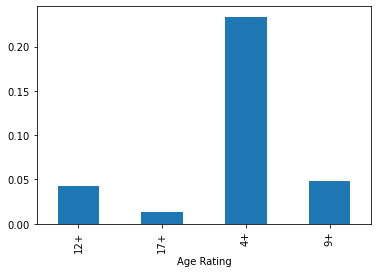

In [67]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq_test = df_test.groupby('Age Rating').size()/len(df_train)  

# mapping values to dataframe 
df_test.loc[:, "{}_freq_encode".format('Age Rating')] = df_test['Age Rating'].map(fq_test)   

# drop original column. 
df_test = df_test.drop(['Age Rating'], axis = 1)  
fq_test.plot.bar(stacked = True)   
df_test.head(10) 

In [68]:
df_train['Languages'].value_counts()

EN                                                                                                    9202
EN, ZH                                                                                                 273
EN, ZH, ZH                                                                                             204
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR                                         203
EN, DE                                                                                                 107
                                                                                                      ... 
AR, DA, NL, EN, FI, FR, DE, EL, HE, HI, HU, ID, IT, JA, KO, NB, PL, PT, RU, ZH, ES, SV, TH, ZH, TR       1
CS, FR, DE, RU                                                                                           1
EN, FR, RU                                                                                               1
EN, DE, PT, RU, ZH, ES               

In [69]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq = df_train.groupby('Languages').size()/len(df_train)  

# mapping values to dataframe 
df_train.loc[:, "{}_freq_encode".format('Languages')] = df_train['Languages'].map(fq)   

# drop original column. 
df_train = df_train.drop(['Languages'], axis = 1)  
#fq.plot.bar(stacked = True)   
df_train.head(2) 

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,gamestore_price,In-app Purchases,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode,Languages_freq_encode
0,https://apps.apple.com/us/app/lottery-life-mon...,Lottery Life - Monopoly Wars,4173eb39-046d-431e-a504-b5418301a382,Monopoly for the New Millenium,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""The spirit of Grand Theft Auto with the strat...",Opposite Lock Entertainment,"Games, Simulation, Finance, Strategy",0.0,31.93,27.017725,14/05/2018,28/12/2018,4.0,25.0,0.958582,0.118849,0.731537
1,https://apps.apple.com/us/app/cute-little-unic...,Cute Little Unicorn Match3,c8cb6281-34fc-4e54-b6f9-1a30657fb370,Little Unicorn Match Crash,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Cute Unicorn Match3 Blast Bomb is a matching p...,Angrisa Leungtanapolkul,"Games, Entertainment, Strategy, Puzzle",0.0,0.00,16.276960,9/11/2017,9/11/2017,NaN,NaN,0.958582,0.696478,0.731537


In [70]:
# Frequency Encoding as the data is Skewed

# grouping by frequency 
fq = df_test.groupby('Languages').size()/len(df_test)  

# mapping values to dataframe 
df_test.loc[:, "{}_freq_encode".format('Languages')] = df_test['Languages'].map(fq)   

# drop original column. 
df_test = df_test.drop(['Languages'], axis = 1)  
#fq.plot.bar(stacked = True)   
df_test.head(2) 

,URL,Name,game_id,Subtitle,Icon URL,Description,Developer,Genres,In-app Purchases,Size,Original Release Date,Current Version Release Date,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode,Languages_freq_encode
0,https://apps.apple.com/us/app/block-in-the-hol...,Block in the Hole Slider Puzzle Pro,a77cadb6-07f5-4f48-b012-df7b758cc3e4,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""Check out this addictive and unique puzzle ga...",Amy Prizer,"Games, Strategy, Puzzle",0.0,15.836196,25/02/2017,25/02/2017,NaN,NaN,0.322999,0.233802,0.735419
1,https://apps.apple.com/us/app/craft-warriors/i...,Craft Warriors,70a0edf7-3bad-4a4b-bad4-f7fdd6aca14e,A New Generation RTS,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""A new generation 3D real-time strategy game!\...","Translimit, Inc.","Games, Strategy, Simulation",167.9,21.454198,22/04/2018,29/07/2019,4.5,14689.0,0.322999,0.047778,0.735419


In [71]:
df_train['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    98
Vikash Patel                                  71
Netsummit Marketing, Inc.                     70
GabySoft                                      59
NetSummit Enterprises, Inc.                   55
                                              ..
DV Artz Limited                                1
PisCava LLC                                    1
Jun woo Kim                                    1
Cameron Ewart                                  1
PNIX, Inc.                                     1
Name: Developer, Length: 7091, dtype: int64

In [72]:
df_train['Average User Rating'].value_counts()

4.5    2107
4.0    1285
5.0     740
3.5     685
3.0     377
2.5     253
2.0     120
1.5      46
1.0       9
Name: Average User Rating, dtype: int64

In [73]:
df_train['Average User Rating']=df_train['Average User Rating'].replace(np.nan,df_train['Average User Rating']
                                                                        .value_counts().index[0])

In [74]:
df_test['Average User Rating']=df_test['Average User Rating'].replace(np.nan,df_test['Average User Rating']
                                                                        .value_counts().index[0])

In [75]:
df_train['User Rating Count'].value_counts()

5.0        296
6.0        241
7.0        197
8.0        193
11.0       135
          ... 
22368.0      1
3197.0       1
3318.0       1
1241.0       1
37350.0      1
Name: User Rating Count, Length: 1461, dtype: int64

In [76]:
df_train['User Rating Count'].median()

44.0

In [77]:
df_train['User Rating Count']=df_train['User Rating Count'].replace(np.nan,df_train['User Rating Count'].median())

In [78]:

df_test['User Rating Count']=df_test['User Rating Count'].replace(np.nan,df_test['User Rating Count'].median())

In [79]:
df_train=df_train.drop(['URL','Name','Subtitle','Icon URL','Developer','game_id','Original Release Date',
                        'Current Version Release Date'],axis=1)

In [80]:
df_test=df_test.drop(['URL','Name','Subtitle','Icon URL','Developer','game_id','Original Release Date',
                        'Current Version Release Date'],axis=1)

In [81]:
df_train.head(5)

,Description,Genres,gamestore_price,In-app Purchases,Size,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode,Languages_freq_encode
0,"""The spirit of Grand Theft Auto with the strat...","Games, Simulation, Finance, Strategy",0.0,31.93,27.017725,4.0,25.0,0.958582,0.118849,0.731537
1,Cute Unicorn Match3 Blast Bomb is a matching p...,"Games, Entertainment, Strategy, Puzzle",0.0,0.00,16.276960,4.5,44.0,0.958582,0.696478,0.731537
2,Bored of playing yet another multiplayer word ...,"Games, Casual, Strategy",0.0,4.96,19.528240,3.5,27.0,0.958582,0.146196,0.731537
3,Race across our dunes in a effort to achieve ...,"Games, Strategy, Productivity, Family",0.0,3.99,23.932939,4.5,44.0,0.958582,0.696478,0.731537
4,CRIBBAGE SQUARE COLLECTION is an 12-in-1 colle...,"Games, Card, Entertainment, Strategy",0.0,0.00,17.901007,4.5,44.0,0.958582,0.696478,0.731537


In [82]:
df_test.head(5)

,Description,Genres,In-app Purchases,Size,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode,Languages_freq_encode
0,"""Check out this addictive and unique puzzle ga...","Games, Strategy, Puzzle",0.00,15.836196,4.5,48.0,0.322999,0.233802,0.735419
1,"""A new generation 3D real-time strategy game!\...","Games, Strategy, Simulation",167.90,21.454198,4.5,14689.0,0.322999,0.047778,0.735419
2,A classic turn-based strategy that go straight...,"Games, Strategy, Board",0.00,18.213408,4.5,48.0,0.322999,0.047778,0.735419
3,Infinitely joyful fairytale valley used to be ...,"Games, Puzzle, Strategy, Entertainment",3.98,17.853528,2.5,10.0,0.322999,0.233802,0.735419
4,Think you are up for this challenge?\n\nThe be...,"Games, Strategy, Entertainment, Puzzle",0.00,18.958749,4.5,48.0,0.322999,0.233802,0.735419


In [83]:
from nltk.corpus import stopwords

In [85]:
import operator

In [84]:
r = Rake()

In [86]:
text = df_train['Description']

In [88]:
rake_object = rake.Rake()
keywords = rake_object.run(text) 

NameError: name 'rake' is not defined

In [107]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
rake_test = df_train.copy()

In [109]:
rake_test.head(2)

,Description,Genres,gamestore_price,In-app Purchases,Size,Average User Rating,User Rating Count,Primary Genre_freq_encode,Age Rating_freq_encode,Languages_freq_encode
0,"""The spirit of Grand Theft Auto with the strat...","Games, Simulation, Finance, Strategy",0.0,31.93,27.017725,4.0,25.0,0.958582,0.118849,0.731537
1,Cute Unicorn Match3 Blast Bomb is a matching p...,"Games, Entertainment, Strategy, Puzzle",0.0,0.00,16.276960,4.5,44.0,0.958582,0.696478,0.731537


In [99]:
# initializing the new column
rake_test['Key_words'] = ""

for index, row in rake_test.iterrows():
    Description = row['Description']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(Description)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
rake_test.drop(columns = ['Description'], inplace = True)

In [100]:
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'n': 11,
             'control': 2,
             'flying': 8,
             'snake': 8,
             'vs': 5,
             'color': 5,
             'block': 5,
             'addictive': 6,
             'endless': 6,
             'runner': 6,
             'game': 6,
             '.\\': 9,
             'nrelaxed': 1,
             'calm': 1,
             'beautiful': 3,
             'exotic': 3,
             'world': 3,
             'zen': 1,
             'little': 3,
             'like': 3,
             'background': 3,
             'music': 3,
             'simple': 1,
             'blocks': 3})

In [102]:
rake_test['Key_words'].describe()

count     12579
unique        1
top            
freq      12579
Name: Key_words, dtype: object

In [106]:
row['Key_words'].describe()

AttributeError: 'list' object has no attribute 'describe'

In [82]:
df_train=df_train.drop(['Description'],axis=1)

In [83]:
df_test=df_test.drop(['Description'],axis=1)

In [84]:
df_train['Genres'].value_counts()

Games, Strategy, Puzzle                                           565
Games, Puzzle, Strategy                                           528
Games, Strategy                                                   435
Games, Strategy, Action                                           360
Games, Simulation, Strategy                                       336
                                                                 ... 
Games, Board, News, Strategy                                        1
Games, Role Playing, Strategy, Finance                              1
Games, Strategy, Role Playing, Health & Fitness                     1
Stickers, Games, Emoji & Expressions, Gaming, Strategy, Action      1
Games, Strategy, Lifestyle, Family                                  1
Name: Genres, Length: 886, dtype: int64

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')

In [87]:
df_train.shape

(12579, 9)

In [88]:
df_test.shape

(4252, 8)

In [89]:
train = df_train.copy()

In [90]:
test = df_test.copy()

In [91]:
vec_train = train['Genres']
vec_test = test['Genres']

In [92]:
vec_train_fit = vect.fit_transform(vec_train)

In [93]:
vec_train_fit.shape

(12579, 55)

In [94]:
vec_test_fit = vect.fit_transform(vec_test)

In [95]:
vec_test_fit.shape

(4252, 48)

In [96]:
data_merge_train = pd.DataFrame(vec_train_fit.toarray())
data_merge_test = pd.DataFrame(vec_test_fit.toarray())

In [97]:
data_merge_train.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.415381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.924466,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
data_merge_train.shape

(12579, 55)

In [99]:
data_merge_test.shape

(4252, 48)

In [100]:
data_merge_train=pd.concat([df_train,data_merge_train],axis=1)

In [101]:
data_merge_test=pd.concat([df_test,data_merge_test],axis=1)

In [102]:
data_merge_train=data_merge_train.drop(['Genres'],axis=1)

In [103]:
data_merge_test=data_merge_test.drop(['Genres'],axis=1)

In [104]:
data_merge_train.isna().sum()

gamestore_price        172
In-app Purchases       172
Size                   172
Average User Rating    172
User Rating Count      172
                      ... 
50                     172
51                     172
52                     172
53                     172
54                     172
Length: 63, dtype: int64

In [105]:
data_merge_train.dropna(inplace=True)

In [106]:
data_merge_train.isna().sum()

gamestore_price        0
In-app Purchases       0
Size                   0
Average User Rating    0
User Rating Count      0
                      ..
50                     0
51                     0
52                     0
53                     0
54                     0
Length: 63, dtype: int64

In [107]:
## Dividing the training data into X and y for model building and evaluations

In [108]:
X = data_merge_train.drop(['gamestore_price'], axis=1)
y = data_merge_train['gamestore_price']

In [109]:
## Slipng the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
#plt.subplots()
#sns.heatmap(df_train.corr(), annot=True,cmap="YlGnBu")

In [111]:
## Building the Liner regression model

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8654, 62)
(8654,)
(3710, 62)
(3710,)


In [113]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Model Score is',model_score)

Model Score is 0.033148589029321274


In [114]:
from sklearn.metrics import mean_absolute_error

In [115]:
mean_absolute_error(y_test, y_predict)

0.6295630450891443

In [116]:
## Building the SVR model
from sklearn.svm import SVR

In [117]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
regressor_score = regressor.score(X_test, y_test)
print('Model Score is',regressor_score)

Model Score is -0.054235745831515025


In [118]:
mean_absolute_error(y_test, y_predict)

0.43763764281147777

In [ ]:
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred) 

In [ ]:
df = df_train.copy()

In [ ]:
df['Genres'].isna().sum()

In [ ]:
df['Genres'].value_counts()

In [ ]:
def cleanString(review):
    stopWords = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    returnString = ""
    sentence_token = tokenize.word_tokenize(review)
    idx_list = []
    for j in range(len(sentence_token)):

        single_sentence = tokenize.word_tokenize(sentence_token[j])
        
        single_sentence=[lemmatizer.lemmatize(t) for t in single_sentence]
       
        single_sentence=[word for word in single_sentence if word.lower() not in stopWords]
        
        sentences_filtered = [(idx,lemmatizer.lemmatize(w.lower())) for idx,w in enumerate(single_sentence) 
                              if w.lower() not in stopWords and w.isalnum()]
        
        idx_list.append([x[0] for x in sentences_filtered])        
        
        word_list = [x[1] for x in sentences_filtered]
        
        returnString = returnString + ' '.join(word_list) + ' '
        
    return returnString


In [ ]:
def tokenize_test(model,train,validation):
 #APPLY CHARACTER VECTORIZER TRANSFORM ON VALIDATION DATA, 20000 dimensions of characters are created
    X_test1 = char_vectorizer.transform(validation)
    X_test2 = word_vectorizer.transform(validation)
    test_stack = hstack([X_test1,X_test2])
    #APPLY WORD VECTORIZER TRANSFORM ON VALIDATION DATA, 3000 dimensions of words are created
     
    #train_text = vect.fit_transform(train["Text"])
    #print ('Features: ', train_text.shape[1])
    #test_text = vect.transform(validation["Text"])
      #Normalize the incoming test stack and train data
       
    train_features2 = Normalizer(copy=False).fit_transform(train_features1)
    test_stack = Normalizer(copy=False).transform(test_stack)
    
    
    model.fit(train_features2, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    #word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    #char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    #X_test1 = word_model.transform(clntxt)
    #X_test2 = char_model.transform(clntxt)
    #test_stack = hstack([X_test1,X_test2])
    #LOWER THE DIMENSION USING SVD IN PRINCIPAL COMPONENT ANALYSIS TO VERY FEW 500 DIMENSIONS
      
    svd_model=pickle.load( open( "Pyhton_SVD_preprocessing.sav", "rb" ) )
    test_stack=svd_model.transform(test_stack)
    
      #FIT THE MODEL and SAVE THE FITTED MODEL
            # APPLY UNSUPERVISED METHOD PAIRWAISE COSINE DISTANCE BETWEEN THE INCOMING TEXT and DOCUMENT and FIND THE CLOSEST MATCH 
                #Unsupervised method ensures the words are matched with context of the document and closest match is choosen for prediction
                 #Predict the model with the incoming test data
   
    best_thread = pairwise_distances_argmin(
            X=test_stack,
            Y=train_features2,
            metric='cosine'
        )
    
    
    print(best_thread)
    # There are two predictions done here. best_thread is an output from pairwise cosine distance and that is used for prediction 
    # Original test word is also used for prediction
    y_pred_class1 = model.predict(train_features2[best_thread])
    y_pred_class2 = model.predict(test_stack)
    print(y_pred_class1,y_pred_class2)
    #return(y_pred_class1,y_pred_class2)
    
    
    y_pred_class = model.predict(test_stack)
    # Print the training accuracy 
    print("Training Accuracy")
    print(model.score(train_features2,y_train))
    #Print the test accuracy with original incoming text
    print("Testing Accuracy1")
    print(model.score(test_stack,y_test1))
    #Print the test accuracy with pairwise distance (cosine) from the original text and similar words
    print("Testing Accuracy2")
    print(model.score(train_features1[best_thread],y_test1))

In [ ]:
def cleanString(review):
    # Setup the stopwords from the English dictionary
    #This can be used to clean Entire Dataframe of Documents.
    stopWords = set(stopwords.words('english'))
    #Create an object for word lemmatizer
    lemmatizer = WordNetLemmatizer()
    returnString = ""
    #Tokenize the words from string to a list
    sentence_token = tokenize.word_tokenize(review)
    idx_list = []
    for j in range(len(sentence_token)):
        #For each sentence after tokenization, we take in the word for processing
        single_sentence = tokenize.word_tokenize(sentence_token[j])
        #We apply the word lemmetizer to lemmatize the word where we remove verb , adjactive inorder to provide the required word in the sentence.
        single_sentence=[lemmatizer.lemmatize(t) for t in single_sentence]
        # Filter stop words , make the all words in lower character and enumerate the sentence to remove special characters.
        single_sentence=[word for word in single_sentence if word.lower() not in stopWords]
        sentences_filtered = [(idx,lemmatizer.lemmatize(w.lower())) for idx,w in enumerate(single_sentence) 
                              if w.lower() not in stopWords and w.isalnum()]
        idx_list.append([x[0] for x in sentences_filtered])
        #Filtered string is taken for further processing
        word_list = [x[1] for x in sentences_filtered]
        returnString = returnString + ' '.join(word_list) + ' '
    
    return returnString
def cleanData(string1):
    articles = []
    n = 1
    #special case of Clean String function specifically implemented for cleaning the Incoming text(onely one text)
    # In this case, we clean only one question which is entered by the user in the GUI
    for i in range(n):
        temp_string = cleanString(string1)
        articles.append(temp_string)
        print(str(i+1)+' of '+str(n)+" articles cleaned.",end='\r')
    
    return(articles)
def tokenize_test(model,train,validation):
 #APPLY CHARACTER VECTORIZER TRANSFORM ON VALIDATION DATA, 20000 dimensions of characters are created
    X_test1 = char_vectorizer.transform(validation)
    X_test2 = word_vectorizer.transform(validation)
    test_stack = hstack([X_test1,X_test2])
    #APPLY WORD VECTORIZER TRANSFORM ON VALIDATION DATA, 3000 dimensions of words are created
     
    #train_text = vect.fit_transform(train["Text"])
    #print ('Features: ', train_text.shape[1])
    #test_text = vect.transform(validation["Text"])
      #Normalize the incoming test stack and train data
       
    train_features2 = Normalizer(copy=False).fit_transform(train_features1)
    test_stack = Normalizer(copy=False).transform(test_stack)
    
    
    model.fit(train_features2, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    #word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    #char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    #X_test1 = word_model.transform(clntxt)
    #X_test2 = char_model.transform(clntxt)
    #test_stack = hstack([X_test1,X_test2])
    #LOWER THE DIMENSION USING SVD IN PRINCIPAL COMPONENT ANALYSIS TO VERY FEW 500 DIMENSIONS
      
    svd_model=pickle.load( open( "Pyhton_SVD_preprocessing.sav", "rb" ) )
    test_stack=svd_model.transform(test_stack)
    
      #FIT THE MODEL and SAVE THE FITTED MODEL
            # APPLY UNSUPERVISED METHOD PAIRWAISE COSINE DISTANCE BETWEEN THE INCOMING TEXT and DOCUMENT and FIND THE CLOSEST MATCH 
                #Unsupervised method ensures the words are matched with context of the document and closest match is choosen for prediction
                 #Predict the model with the incoming test data
   
    best_thread = pairwise_distances_argmin(
            X=test_stack,
            Y=train_features2,
            metric='cosine'
        )
    
    
    print(best_thread)
    # There are two predictions done here. best_thread is an output from pairwise cosine distance and that is used for prediction 
    # Original test word is also used for prediction
    y_pred_class1 = model.predict(train_features2[best_thread])
    y_pred_class2 = model.predict(test_stack)
    print(y_pred_class1,y_pred_class2)
    #return(y_pred_class1,y_pred_class2)
    
    
    y_pred_class = model.predict(test_stack)
    # Print the training accuracy 
    print("Training Accuracy")
    print(model.score(train_features2,y_train))
    #Print the test accuracy with original incoming text
    print("Testing Accuracy1")
    print(model.score(test_stack,y_test1))
    #Print the test accuracy with pairwise distance (cosine) from the original text and similar words
    print("Testing Accuracy2")
    print(model.score(train_features1[best_thread],y_test1))




In [ ]:
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# new data frame with split value columns 
new = data["Name"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["First Name"]= new[0] 
  
# making separate last name column from new data frame 
data["Last Name"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Name"], inplace = True) 
  
# df display 
data 

In [ ]:
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:

df_expt=df_train.drop(['URL','Name','Subtitle', 'Icon URL', 'Description','Developer',],axis=1)
df_expt_test=df_test.drop(['URL','Name','Subtitle', 'Icon URL', 'Description','Developer',],axis=1)

df_expt=df_expt.drop([ 'Languages','Original Release Date', 'Current Version Release Date',],axis=1)
df_expt_test=df_expt_test.drop([ 'Languages', 'Original Release Date', 'Current Version Release Date',],axis=1)
df_expt['Size'] = np.cbrt(df_expt['Size'])
df_expt_test['Size'] = np.cbrt(df_expt_test['Size'])

df_expt['In-app Purchases'] = df_expt['In-app Purchases'].str.split(',', expand=True).astype(float).sum(axis=1)
df_expt_test['In-app Purchases'] = df_expt_test['In-app Purchases'].str.split(',', expand=True).astype(float).sum(axis=1)
df_expt_test['Average User Rating']=df_expt_test['Average User Rating'].replace(np.nan,df_expt_test['Average User Rating'].value_counts().index[0])
df_expt_test['User Rating Count']=df_expt_test['User Rating Count'].replace(np.nan,df_expt_test['User Rating Count'].value_counts().index[0])
df_expt['Average User Rating']=df_expt['Average User Rating'].replace(np.nan,df_expt['Average User Rating'].value_counts().index[0])
df_expt['User Rating Count']=df_expt['User Rating Count'].replace(np.nan,df_expt['User Rating Count'].value_counts().index[0])





#df_expt_test['User Rating Count']=np.where(df_expt_test['User Rating Count'] > 9.0, 9.0, df_expt_test['User Rating Count'] )
#df_expt['User Rating Count']=np.where(df_expt['User Rating Count'] > 9.0, 9.0, df_expt['User Rating Count'] )
#df_expt_test['Average User Rating']=np.where(df_expt_test['Average User Rating'] < 2.5, 2.5, df_expt_test['User Rating Count'] )
#df_expt['Average User Rating']=np.where(df_expt['Average User Rating'] < 2.5, 2.5, df_expt['User Rating Count'] )
#df_expt['gamestore_price']=np.where(df_expt['gamestore_price'] > 11.99, 11.99, df_expt['User Rating Count'] )

#p.where(array1==0, 1, array1) 
#df.column_name.loc[df.column_name < 135]  = 5.0
df_expt = df_expt.groupby('gamestore_price').filter(lambda x: len(x) >= 50)
#df_expt = df_expt.groupby('User Rating Count').filter(lambda x: len(x) >= 40)
#df_expt = df_expt.groupby('Average User Rating').filter(lambda x: len(x) >= 200)
#index_names = df_expt[ df_expt['gamestore_price'] > 15 ].index

#df_expt.drop(index_names, inplace = True)

#df_expt_test = df_expt_test.groupby('gamestore_price').filter(lambda x: len(x) >= 50)
#from sklearn.preprocessing import Imputer
#imp1 = Imputer(missing_values=np.nan, strategy='',axis=0)

#df_expt['Average User Rating'] =  imp1.fit_transform(df_expt[['Average User Rating']])
#df_expt_test['Average User Rating'] = imp1.fit_transform(df_expt_test[['Average User Rating']])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
Xtest = df_expt_test.Genres
X= df_expt.Genres

In [ ]:
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
                 stop_words='english')
X_train_dtm = vect.fit_transform(X)

In [ ]:
X_test_dtm = vect.transform(Xtest)

In [ ]:
data_merge=pd.DataFrame(X_train_dtm.toarray())
data_merge_test=pd.DataFrame(X_test_dtm.toarray())

In [ ]:
#from sklearn.preprocessing import Imputer
#imp1 = Imputer(missing_values=np.nan, strategy='most_frequent',axis=0)



#df_expt['Age Rating']  = imp1.fit_transform(df_expt[['Age Rating]])
#df_expt_test['Age Rating] =  imp1.fit_transform(df_expt_test[['Age Rating]])
#df_expt['Average User Rating'] =  imp1.fit_transform(df_expt[['Average User Rating']])
#df_expt_test['Average User Rating'] = imp1.fit_transform(df_expt_test[['Average User Rating']])
#df_expt=df_expt.dropna(subset=['Age Rating'])
#df_expt_test=df_expt_test.dropna(subset=['Age Rating'])
df_expt=df_expt.dropna(subset=['gamestore_price'])
df1=df_expt[['Primary Genre','Age Rating', ]]
df2=df_expt_test[['Primary Genre','Age Rating',]]
dummy1=pd.get_dummies(df1)
dummy1.drop(['Primary Genre_Health & Fitness','Primary Genre_News',],axis=1,inplace=True)
dummy2=pd.get_dummies(df2)
final_data=pd.concat([df_expt,dummy1],axis=1)
final_data_test=pd.concat([df_expt_test,dummy2],axis=1)


final_data_test.drop(['Genres','Primary Genre','Age Rating',],inplace=True,axis=1)
final_data.drop(['Genres','Primary Genre','Age Rating'],inplace=True,axis=1)


final_data=pd.concat([final_data,data_merge],axis=1)
final_data_test=pd.concat([final_data_test,data_merge_test],axis=1)
#'Primary Genre_Travel'

#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#data_ohe = encoder.fit_transform(data)
#data_test_ohe = encoder.transform(data_test)

In [ ]:
Y=final_data.pop('gamestore_price')

In [ ]:
game_id=final_data.pop('game_id')

In [ ]:
game_id_test=final_data_test.pop('game_id')

In [ ]:
X=final_data

In [ ]:
X_test=final_data_test

In [ ]:
X_test=X_test.fillna(0)
X=X.fillna(0)
Y=Y.fillna(0)

In [ ]:
#Polynomial Features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer 
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor


from sklearn.neural_network import MLPRegressor
####Neural Net
X.drop(['Primary Genre_Travel'],axis=1,inplace=True)
X_train,Xtest,y_train,y_test=train_test_split(X,Y,test_size=0.02,random_state=42)
nn = MLPRegressor(
    hidden_layer_sizes=(5,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=10000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
sc=StandardScaler()
poly = PolynomialFeatures(degree=2)
scaledXtrain = sc.fit_transform(X)
scaledXtest = sc.transform(Xtest)
polyXtrain = poly.fit_transform(scaledXtrain)
polyXtest = poly.transform(scaledXtest)
pca=PCA()
pcaXtrain = pca.fit_transform(polyXtrain)
pcaXtest = pca.transform(polyXtest)
nn.fit(pcaXtrain, Y.ravel())
y_pred = nn.predict(pcaXtest)
print(np.sqrt(mean_absolute_error(y_test,nn.predict(pcaXtest))))
lr_cv = cross_val_score(nn,pcaXtest,y_test, cv=20,scoring='mean_absolute_error').ravel()
pred1=cross_val_predict(nn, pcaXtest, y_test, cv=20, method='predict')
print("Training R2")
print(nn.score(pcaXtrain,Y))


print("Test R2")
print(nn.score(pcaXtrain,pred1))

In [ ]:
scaledXtest = sc.transform(X_test)

polyXtest = poly.transform(scaledXtest)

pcaXtest = pca.transform(polyXtest)
y_pred = nn.predict(X_test)

In [ ]:
#df_train.to_csv('df_train.csv', sep=',',encoding='utf-8', index=False)
#df_test.to_csv('df_test.csv', sep=',',encoding='utf-8', index=False)

In [ ]:
df_train.head()

In [ ]:
df_train.columns

In [ ]:
df_train.info()

In [ ]:
df_train.describe(include='all').transpose()

In [ ]:
df_train.describe().transpose()

In [ ]:
df = df_train.copy()

In [ ]:
n = df.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

In [ ]:
df['User Rating Count'].value_counts()

In [ ]:
index_names = df[ df['User Rating Count'] > 50 ].index 

df.drop(index_names, inplace = True) 

In [ ]:
df['User Rating Count'].value_counts()

In [ ]:
df['gamestore_price'].value_counts()

In [ ]:

df = df.groupby('gamestore_price').filter(lambda x: len(x) >= 50)

In [ ]:
index_names = df[ df['gamestore_price'] > 15 ].index 

df.drop(index_names, inplace = True) 

In [ ]:
# import pandas library 
import pandas as pd 
  
# dictionary with list object in values 
details = { 
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 
              'Shivangi', 'Priya', 'Swapnil'], 
    'Age' : [23, 21, 22, 21, 24, 25], 
    'University' : ['BHU', 'JNU', 'DU', 'BHU',  
                    'Geu', 'Geu'], 
} 
  
# creating a Dataframe object  
df = pd.DataFrame(details, columns = ['Name', 'Age', 
                                      'University'], 
                  index = ['a', 'b', 'c', 'd', 'e', 'f']) 
  
# get names of indexes for which 
# column Age has value 21 
index_names = df[ df['Age'] == 21 ].index 
  
# drop these row indexes 
# from dataFrame 
df.drop(index_names, inplace = True) 
  
df 


In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [ ]:
df['Size'] = np.sqrt(df['Size'])

In [ ]:
null_columns = df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

In [ ]:
null_columns = df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

In [ ]:
df.dropna(subset=['gamestore_price'],inplace=True)

In [ ]:
df.shape

In [ ]:
df.dropna(thresh=0,inplace=True)

In [ ]:
# storing unique value in a variable 
unique_value = df['gamestore_price'].nunique() 
  
# printing value 
print(unique_value) 

In [ ]:
df['gamestore_price'].value_counts()

In [ ]:
df['gamestore_price'].isnull().sum()

In [ ]:
df.dropna(subset=['gamestore_price'],inplace=True)

In [ ]:
df['gamestore_price'].isnull().sum()

In [ ]:
df.shape

In [ ]:
df_train.shape

In [ ]:
sns.distplot(df['gamestore_price'])

In [ ]:
# storing unique value in a variable 
unique_value = df['Size'].nunique() 
  
# printing value 
print(unique_value)

In [ ]:
df['Size'].value_counts()

In [ ]:
# storing unique value in a variable 
unique_value = df['User Rating Count'].nunique() 
  
# printing value 
print(unique_value)

In [ ]:
df['User Rating Count'].value_counts()

In [ ]:
sns.boxplot(x=df['gamestore_price'])

In [ ]:
sns.distplot(df['gamestore_price'])

In [ ]:
df['gamestore_price'] = np.sqrt(df['gamestore_price'])

In [ ]:
sns.distplot(df['gamestore_price'])

In [ ]:
sns.distplot(df['Size'])

In [ ]:
sns.distplot(df['Average User Rating'])

In [ ]:
sns.distplot(df['User Rating Count'])

In [ ]:
to_log = ['gamestore_price']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

In [ ]:
df.columns

In [ ]:
sns.distplot(df['gamestore_price'])